In [98]:
import numpy as np
from scipy.stats import poisson, beta
import matplotlib.pyplot as plt

In [3]:
delta, T = 3, 2

In [12]:
# Assume sorted
withdrawals = [1,4,5,6,8,9,10,13]

In [16]:
wIndex, currentTime = 0, 0
currentPeriodWithdrawals = []
while wIndex < len(withdrawals):
    # Only continue if the current withdrawal request is beyond the current time.
    withdrawal = withdrawals[wIndex]
    if withdrawal > currentTime:
        currentTime += 1
        
    # Remove any withdrawals that are now outside of the window (prob could do with list comprehension)
    for i in range(len(currentPeriodWithdrawals)):
        if currentTime - currentPeriodWithdrawals[i] > T:
            continue
        else:
            currentPeriodWithdrawals = currentPeriodWithdrawals[i:]
            break
    
    # See if there is room to add the current withdrawal
    currentPeriodBalance = len(currentPeriodWithdrawals)
    if currentPeriodBalance < delta:
        currentPeriodWithdrawals.append(withdrawal)
        wIndex += 1

    # Increment time.
    currentTime += 1
    
currentTime

0


1

In [30]:
delta, T = 2, 3
withdrawals = [1,4,5,6,7,7,7,8,9,10,11,11,11,13]

In [32]:
currentTime = 0
ineligibleWds = withdrawals
eligibleWds, pastWds = [], []

while len(ineligibleWds) != 0 or len(eligibleWds) != 0:
    currentTime += 1
    
    # add to queue of eligible
    eligibleWds.extend([i for i in ineligibleWds if i < currentTime])
    
    # remove from ineligible
    ineligibleWds = [i for i in ineligibleWds if i >= currentTime]
    
    # remove expired withdrawals
    pastWds = [i for i in pastWds if currentTime - i <= T]
    
    # churn remaining
    churn = delta - sum(pastWds)
    if churn > 0:
        pastWds.extend(eligibleWds[:churn])
        
        # *** THIS IS THE POP OPERATION FROM THE FRONT OF THE QUEUE *** #
        eligibleWds = eligibleWds[churn:]

    print(currentTime, eligibleWds, ineligibleWds, pastWds)

1 [] [1, 4, 5, 6, 7, 7, 7, 8, 9, 10, 11, 11, 11, 13] []
2 [] [4, 5, 6, 7, 7, 7, 8, 9, 10, 11, 11, 11, 13] [1]
3 [] [4, 5, 6, 7, 7, 7, 8, 9, 10, 11, 11, 11, 13] [1]
4 [] [4, 5, 6, 7, 7, 7, 8, 9, 10, 11, 11, 11, 13] [1]
5 [] [5, 6, 7, 7, 7, 8, 9, 10, 11, 11, 11, 13] [4]
6 [5] [6, 7, 7, 7, 8, 9, 10, 11, 11, 11, 13] [4]
7 [5, 6] [7, 7, 7, 8, 9, 10, 11, 11, 11, 13] [4]
8 [7, 7, 7] [8, 9, 10, 11, 11, 11, 13] [5, 6]
9 [7, 7, 7, 8] [9, 10, 11, 11, 11, 13] [6]
10 [7, 8, 9] [10, 11, 11, 11, 13] [7, 7]
11 [9, 10] [11, 11, 11, 13] [7, 8]
12 [11, 11, 11] [13] [9, 10]
13 [11, 11, 11] [13] [10]
14 [11, 13] [] [11, 11]
15 [] [] [11, 13]


In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [105]:
poisson.cdf(14, 10)

0.9165415270653372

In [213]:
# order statistic stuff
rate = 10
churn = 3

threshold = 0
for i in range(churn, 100):
    probNumWithdrawals = poisson.pmf(i, rate)
    if probNumWithdrawals < float(1e-15):
        break
    orderStat = churn / (i+1)
    threshold += (probNumWithdrawals * orderStat)
#     print("{:d},{:0.4f},{:0.4f},{:0.4f}".format(i, probNumWithdrawals, orderStat, threshold))
    
threshold

0.29689918479722277

In [204]:
rate = np.random.poisson(10)
churn = 3
churn / 10

0.3

In [95]:
rate5 = []
rate10
rate20

NameError: name 'rate10' is not defined

In [65]:
def getThreshold(rate, churn):
    threshold = 0
    for i in range(churn, 100):
        probNumWithdrawals = poisson.pmf(rate, i)
        if probNumWithdrawals < float(1e-15):
            break
        orderStat = churn / (i+1)
        threshold += (probNumWithdrawals * orderStat)
    return threshold

In [2]:
# new

In [23]:
poisson.pmf(k=2,mu=1)

0.18393972058572114

In [48]:
def calcNj(j, rate):
    val = 0
    for i in range(0, 100):
        probX = poisson.pmf(k=j+i, mu=rate)
        if probX < float(1e-16):
            break
        eY = j/(j+i+1)
        val += (probX * eY)
    return val

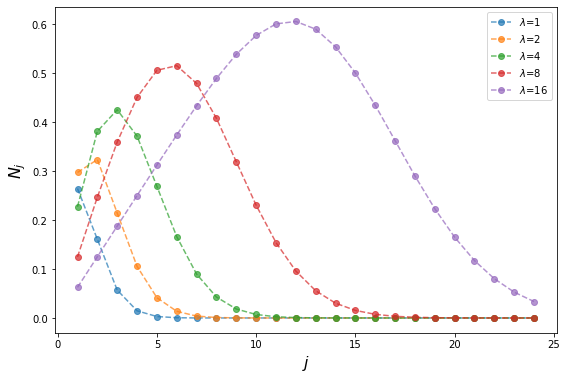

In [65]:
fig, ax = plt.subplots(figsize=(9,6))
for rate in [1, 2, 4, 8, 16]:
    res = [calcNj(i, rate) for i in range(1,25)]
    ax.plot(range(1,25), res, label="$\lambda$={}".format(rate), marker='o', linestyle="--", alpha=0.7)

ax.set_xlabel("$j$", size=16)
ax.set_ylabel("$N_j$", size=16)
plt.legend()
plt.show()

In [66]:
def calcNjt(j, rate, t, T):
    return calcNj(j, rate) * (T-t) / T

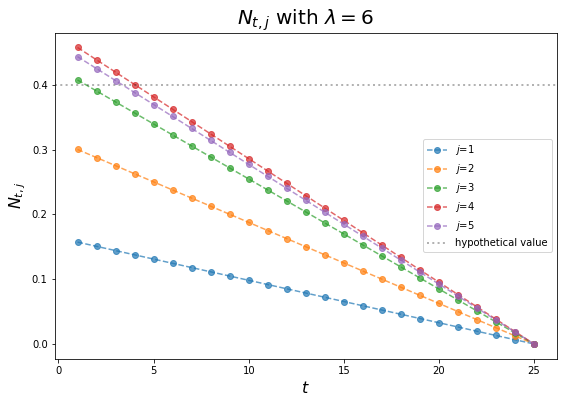

In [161]:
fig, ax = plt.subplots(figsize=(9,6))
for j in [1,2,3,4,5]:
    res = [calcNjt(j, rate=6, t=i, T=25) for i in range(1,26)]
    ax.plot(range(1,26), res, label="$j$={}".format(j), marker='o', linestyle="--", alpha=0.7)

plt.axhline(0.4, color='k', alpha=0.3, linewidth=2, linestyle=':', label='hypothetical value')
    
ax.set_title("$N_{t,j}$ with $\lambda=6$", size=20)
ax.set_xlabel("$t$", size=16)
ax.set_ylabel("$N_{t,j}$", size=16)
plt.legend()
plt.show()

In [ ]:
## E[delta_i | v_i] = prob(cth order statistic < v_i, given one shot of the game)
## one shot of game -> \lambda withdrawals, gives us the prob dist. of the order statistic
## Beta(churn, lambda+1-churn)

In [138]:
churn = 20
rate = 15
beta.cdf(0.3, rate, churn)

0.057131782635977436

interp ^ 
"with 20 available to consume, and a 15 new withdrawals per epoch, a 0.3 value withdrawal has probability 0.057 of making it out each epoch."

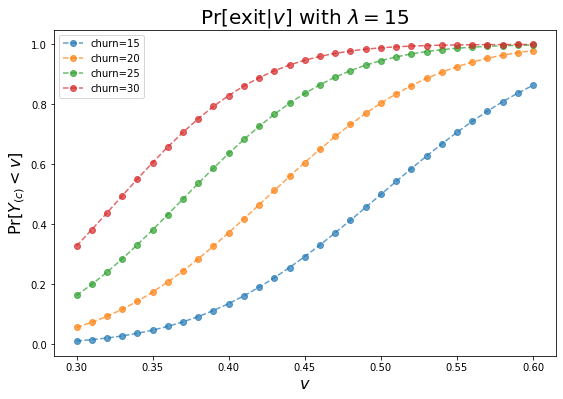

In [150]:
fig, ax = plt.subplots(figsize=(9,6))
for churn in [15,20,25,30]:
    # rate of 15
    res = [beta.cdf(v, 15, churn) for v in np.arange(0.3, 0.61, 0.01)]
    ax.plot(np.arange(0.3, 0.61, 0.01), res, label="churn={}".format(churn), 
            marker='o', linestyle="--", alpha=0.7)

ax.set_title("$\Pr[\mathrm{exit} | v]$b with $\lambda=15$", size=20)
ax.set_xlabel("$v$", size=16)
ax.set_ylabel("$\Pr[Y_{(c)} < v]$", size=16)
plt.legend()
plt.show()

In [171]:
np.arange(0.1, 1, 0.01), np.arange(0.99, 0, -0.01)

(array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
        0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
        0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
        0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
        0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
        0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
        0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
        0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
        0.98, 0.99]),
 array([0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89,
        0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78,
        0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67,
        0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56,
        0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
        0.44, 0.

In [170]:
np.dot(np.arange(0.1, 1, 0.01), np.arange(0.99, 0, -0.01))

41.167500000000025

In [172]:
vals = 1_000_000
vals // (2**16)

15

In [197]:
startVals = 1_000_000
vals = startVals
epochs = 0
while vals > (9*startVals/10):
    vals -= (vals // (2**16))
    epochs += 1
epochs, epochs / epochsPerWeek

(7159, 4.545396825396826)

In [198]:
4.545396825396826 * 7

31.81777777777778

In [196]:
2**16 / 3 / epochsPerWeek * 7

97.09037037037037

384 s / epochs
225 epochs / day
1575 epochs / week